In [11]:
import pandas as pd
import numpy as np
import matplotlib as plt

In [12]:
data_cleaned = pd.read_csv(r'C:\Users\natal\Github\Death-Prediction-Analysis-Congenital-Syphilis\data\clean_data.csv', encoding='latin1')

C:\Users\natal\AppData\Local\Temp\ipykernel_42704\2270981868.py:1: DtypeWarning: Columns (14,19,36,42) have mixed types. Specify dtype option on import or set low_memory=False.
  data_cleaned = pd.read_csv(r'C:\Users\natal\Github\Death-Prediction-Analysis-Congenital-Syphilis\data\clean_data.csv', encoding='latin1')


In [13]:
data_cleaned.shape

(251659, 65)

In [14]:
data_cleaned.columns = data_cleaned.columns.str.upper()

In [16]:
data_cleaned.columns

Index(['UNNAMED: 0', 'TP_NOT', 'SEM_NOT', 'ID_AGRAVO', 'DT_NOTIFIC', 'NU_ANO',
       'SG_UF_NOT', 'ID_MUNICIP', 'ID_REGIONA', 'DT_DIAG', 'SEM_DIAG',
       'NU_IDADE_N', 'CS_SEXO', 'CS_GESTANT', 'CS_RACA', 'CS_ESCOL_N', 'SG_UF',
       'ID_MN_RESI', 'ID_RG_RESI', 'ID_PAIS', 'ANT_IDADE', 'ANT_RACA',
       'ID_OCUPA_N', 'ESCOLMAE', 'ANT_PRE_NA', 'UF_PRE_NAT', 'MUN_PRE_NA',
       'ANTSIFIL_N', 'LAB_PARTO', 'LAB_TITU_2', 'LAB_DT3', 'LAB_CONF',
       'TRA_ESQUEM', 'TRA_DT', 'ANT_TRATAD', 'ANT_UF_CRI', 'ANT_MUNI_C',
       'LABC_SANGU', 'LABC_TIT_1', 'LABC_DT_1', 'LABC_IGG', 'LABC_DT',
       'LABC_LIQUO', 'LABC_TIT_2', 'LABC_DT_2', 'LABC_TITUL', 'LABC_EVIDE',
       'LABC_LIQ_1', 'TRA_DIAG_T', 'TRA_ESQU_1', 'DS_ESQUEMA', 'EVOLUCAO',
       'DT_OBITO', 'EVO_DIAG_N', 'TRA_DIAG_C', 'CLI_ICTERI', 'CLI_RINITE',
       'CLI_ANEMIA', 'CLI_ESPLEN', 'HEPATO', 'CLI_OSTEO', 'LESOES',
       'CLI_OUTRO', 'SIN_OUTR_E', 'CLI_PSEUDO'],
      dtype='object')

In [17]:
# Create outcome columns (death from congenital syphilis, miscarriage and stillbirth) based on EVOLUCAO
data_cleaned['OBITO_SIFILIS'] = data_cleaned['EVOLUCAO'].apply(lambda x: 1 if x == 2 else 0)
data_cleaned['ABORTO'] = data_cleaned['EVOLUCAO'].apply(lambda x: 1 if x == 4 else 0)
data_cleaned['NATIMORTO'] = data_cleaned['EVOLUCAO'].apply(lambda x: 1 if x == 5 else 0)

In [18]:
import matplotlib.pyplot as plt

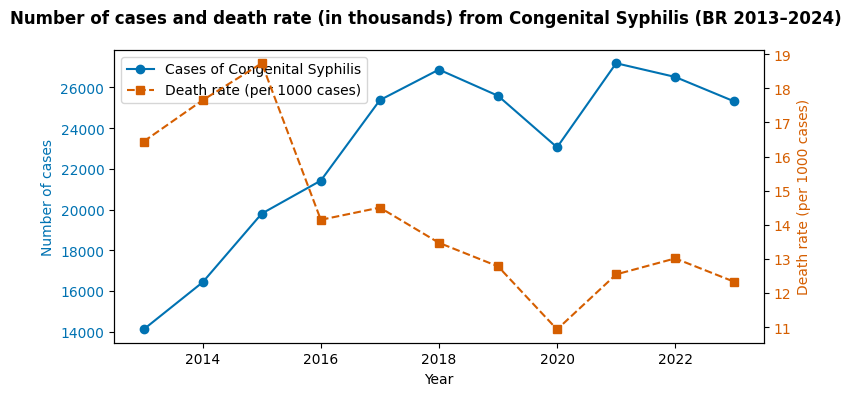

In [19]:
data_year = (
    data_cleaned.groupby("NU_ANO", as_index=False)
    .agg(
        cases=("NU_ANO", "count"),
        deaths=("OBITO_SIFILIS", "sum")
    )
)


data_year["death_rate"] = data_year["deaths"] / data_year["cases"] * 1000  # por 1000 casos


fig, ax1 = plt.subplots(figsize=(8, 4))

ax1.plot(data_year["NU_ANO"], data_year["cases"], color="#0072B2", marker="o", label="Cases of Congenital Syphilis")
ax1.set_xlabel("Year")
ax1.set_ylabel("Number of cases", color="#0072B2")
ax1.tick_params(axis='y', labelcolor="#0072B2")

ax2 = ax1.twinx()
ax2.plot(data_year["NU_ANO"], data_year["death_rate"], color="#D55E00", linestyle="--", marker="s", label="Death rate (per 1000 cases)")
ax2.set_ylabel("Death rate (per 1000 cases)", color="#D55E00")
ax2.tick_params(axis='y', labelcolor="#D55E00")


fig.suptitle("Number of cases and death rate (in thousands) from Congenital Syphilis (BR 2013–2024)", fontsize=12, fontweight="bold")

lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines + lines2, labels + labels2, loc="upper left")

plt.tight_layout()
plt.show()


In [20]:
data_year["death_rate"] = data_year["death_rate"].round(2)

print("\n=== Table: Cases and Deaths per thousand due to Congenital Syphilis ===\n")
print(data_year.to_string(index=False))



=== Table: Cases and Deaths per thousand due to Congenital Syphilis ===

 NU_ANO  cases  deaths  death_rate
   2013  14111     232       16.44
   2014  16428     290       17.65
   2015  19800     371       18.74
   2016  21421     303       14.14
   2017  25374     368       14.50
   2018  26874     362       13.47
   2019  25587     327       12.78
   2020  23056     252       10.93
   2021  27186     341       12.54
   2022  26512     345       13.01
   2023  25310     312       12.33
